In [2]:
import numpy as np

embeddings = {}

with open("glove.6B.100d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embeddings[word] = vector

print("Loaded words:", len(embeddings))


Loaded words: 400000


In [3]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

print("king vs queen:",
      cosine_similarity(embeddings["king"], embeddings["queen"]))


king vs queen: 0.750769


In [7]:
result = embeddings["king"] - embeddings["man"] + embeddings["woman"]

best_word = None
best_score = -1

for word, vec in embeddings.items():
    score = cosine_similarity(result, vec)
    if score > best_score:
        best_score = score
        best_word = word

print("king - man + woman =", best_word)


king - man + woman = king


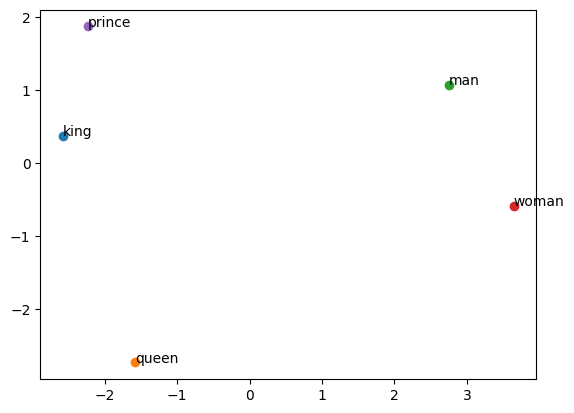

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = ["king","queen","man","woman","prince"]
vectors = [embeddings[w] for w in words]

pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure()
for i, word in enumerate(words):
    plt.scatter(reduced[i,0], reduced[i,1])
    plt.text(reduced[i,0], reduced[i,1], word)
plt.show()
